# Concentration de CO2 dans l'atmosphère depuis 1958

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import requests
import isoweek

## 1. Import des données

Les données ont été téléchargées au format csv depuis le site Web de [l'Institut Scripps](https://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record.html\) le 01/02/2025.

In [2]:
data_url = 'https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/weekly/weekly_in_situ_co2_mlo.csv'

In [3]:
file_path = r"C:\Users\33612\Downloads\weekly_in_situ_co2_mlo.csv"

if not os.path.exists(file_path):
    response = requests.get(data_url)
    with open(file_path, "wb") as file:
        file.write(response.content)
    print("Téléchargement des données et sauvegarde locale.")
else:
    print("Données locales déjà existantes.")

raw_data = pd.read_csv(file_path, names=["date", "concentration"], skiprows=range(1,44)) # retrait des commentaires en haut du fichier .csv
raw_data

Données locales déjà existantes.


date  concentration
0     ----------------------------------------------...            NaN
1                                            1958-03-29         316.19
2                                            1958-04-05         317.31
3                                            1958-04-12         317.69
4                                            1958-04-19         317.58
5                                            1958-04-26         316.48
6                                            1958-05-03         316.95
7                                            1958-05-17         317.56
8                                            1958-05-24         317.99
9                                            1958-07-05         315.85
10                                           1958-07-12         315.85
11                                           1958-07-19         315.46
12                                           1958-07-26         315.59
13                                           1958-08-02         315.64
14                                           1958-08-09         315.10
15                                           1958-08-16         315.09
16                                           1958-08-30         314.14
17                                           1958-09-06         313.54
18                                           1958-11-08         313.05
19                                           1958-11-15         313.26
20                                           1958-11-22         313.57
21                                           1958-11-29         314.01
22                                           1958-12-06         314.56
23                                           1958-12-13         314.41
24                                           1958-12-20         314.77
25                                           1958-12-27         315.21
26                                           1959-01-03         315.24
27                                           1959-01-10         315.50
28                                           1959-01-17         315.69
29                                           1959-01-24         315.86
...                                                 ...            ...
3381                                         2024-06-08         427.01
3382                                         2024-06-15         427.10
3383                                         2024-06-22         426.54
3384                                         2024-06-29         425.41
3385                                         2024-07-06         425.73
3386                                         2024-07-13         426.10
3387                                         2024-07-20         424.36
3388                                         2024-07-27         424.72
3389                                         2024-08-03         424.42
3390                                         2024-08-10         422.50
3391                                         2024-08-17         422.80
3392                                         2024-08-24         421.45
3393                                         2024-08-31         421.57
3394                                         2024-09-07         421.81
3395                                         2024-09-14         421.39
3396                                         2024-09-21         421.77
3397                                         2024-09-28         421.51
3398                                         2024-10-05         421.86
3399                                         2024-10-12         422.13
3400                                         2024-10-19         422.16
3401                                         2024-10-26         422.36
3402                                         2024-11-02         423.15
3403                                         2024-11-09         423.18
3404                                         2024-11-16         423.51
3405                                         2024-11-23         424.03
3406

## 2. Traitement des données

Recherche d'éventuelles lignes vides :

In [4]:
raw_data[raw_data.isnull().any(axis=1)]

date  concentration
0  ----------------------------------------------...            NaN

In [5]:
data = raw_data.dropna().copy()
data

date  concentration
1     1958-03-29         316.19
2     1958-04-05         317.31
3     1958-04-12         317.69
4     1958-04-19         317.58
5     1958-04-26         316.48
6     1958-05-03         316.95
7     1958-05-17         317.56
8     1958-05-24         317.99
9     1958-07-05         315.85
10    1958-07-12         315.85
11    1958-07-19         315.46
12    1958-07-26         315.59
13    1958-08-02         315.64
14    1958-08-09         315.10
15    1958-08-16         315.09
16    1958-08-30         314.14
17    1958-09-06         313.54
18    1958-11-08         313.05
19    1958-11-15         313.26
20    1958-11-22         313.57
21    1958-11-29         314.01
22    1958-12-06         314.56
23    1958-12-13         314.41
24    1958-12-20         314.77
25    1958-12-27         315.21
26    1959-01-03         315.24
27    1959-01-10         315.50
28    1959-01-17         315.69
29    1959-01-24         315.86
30    1959-01-31         315.42
...          ...            ...
3381  2024-06-08         427.01
3382  2024-06-15         427.10
3383  2024-06-22         426.54
3384  2024-06-29         425.41
3385  2024-07-06         425.73
3386  2024-07-13         426.10
3387  2024-07-20         424.36
3388  2024-07-27         424.72
3389  2024-08-03         424.42
3390  2024-08-10         422.50
3391  2024-08-17         422.80
3392  2024-08-24         421.45
3393  2024-08-31         421.57
3394  2024-09-07         421.81
3395  2024-09-14         421.39
3396  2024-09-21         421.77
3397  2024-09-28         421.51
3398  2024-10-05         421.86
3399  2024-10-12         422.13
3400  2024-10-19         422.16
3401  2024-10-26         422.36
3402  2024-11-02         423.15
3403  2024-11-09         423.18
3404  2024-11-16         423.51
3405  2024-11-23         424.03
3406  2024-11-30         424.44
3407  2024-12-07         424.93
3408  2024-12-14         424.79
3409  2024-12-21         425.35
3410  2024-12-28         425.57

[3410 rows x 2 columns]

Conversion de la première colonne au format `datetime` :

In [6]:
data["date"] = pd.to_datetime(data["date"], format="%Y-%m-%d") # Conversion de la première colonne en dates

Premier aperçu des données :

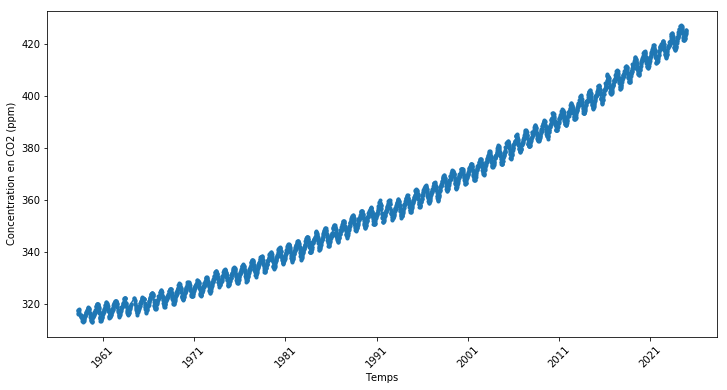

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(data["date"], data["concentration"], marker=".")
plt.xlabel("Temps")
plt.ylabel("Concentration en CO2 (ppm)")
plt.xticks(rotation=45)
plt.show()

### 2.1. Une oscillation périodique superposée à une évolution systématique plus lente :

Afin de séparer la composante oscillante de la tendance générale de cette série temporelle, nous allons utilisier `seasonal_decompose` issue de `statsmodels.tsa.seasonal`. La bibliothèque `statsmodels` permet de réaliser des analyses statistiques sur des séries temporelles.

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

La variation de concentration en CO2 évoluant de manière saisonnière, on estime *a priori* sa période d'oscillation à 52 semaines, c'est-à-dire un an.

In [9]:
decomposed_data = seasonal_decompose(data['concentration'], model="additive", period=52)

data['tendance'] = decomposed_data.trend #Extraction de la tendance
data['oscillations'] = decomposed_data.seasonal #Extraction des oscillations

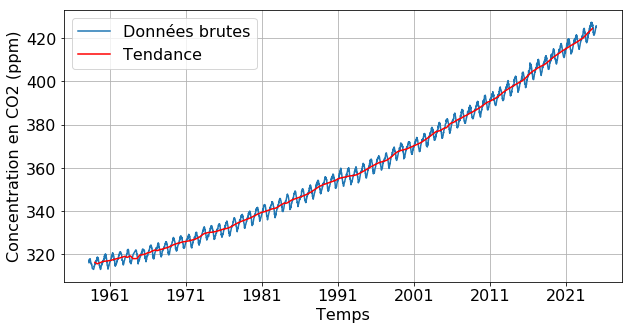

In [10]:
fig1, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(data['date'], data['concentration'], label="Données brutes")
ax1.plot(data['date'], data['tendance'], color="red", label="Tendance")
ax1.set_xlabel('Temps', fontsize=16)
ax1.set_ylabel('Concentration en CO2 (ppm)', fontsize=16)
ax1.legend()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.legend(fontsize=16)
plt.show()

Traçons les deux composantes (lente et rapide) sur des graphes séparés afin de les visualiser : 

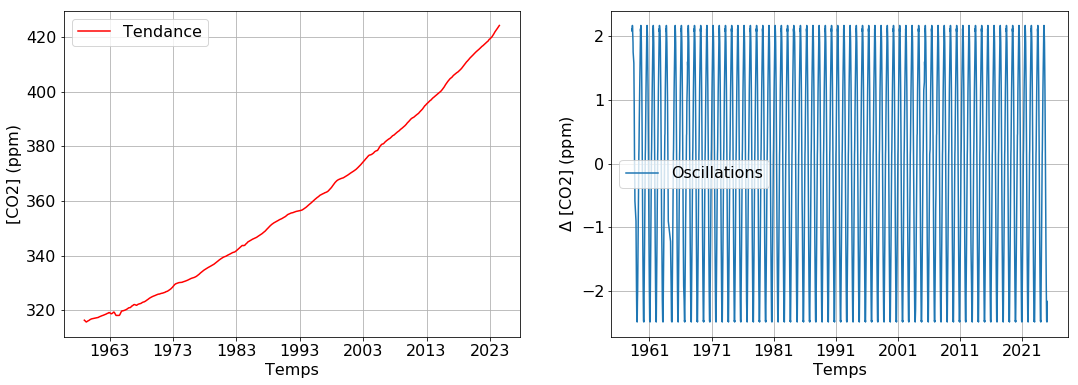

In [11]:
fig2, ax2 = plt.subplots(1,2, figsize=(18, 6))

ax2[0].plot(data['date'], data['tendance'], c='r', label="Tendance")
ax2[0].set_xlabel('Temps', fontsize=16)
ax2[0].set_ylabel('[CO2] (ppm)', fontsize=16)
ax2[0].legend(fontsize=16)
ax2[0].tick_params(axis='both', labelsize=16)
ax2[0].grid()

ax2[1].plot(data['date'], data['oscillations'], label="Oscillations")
ax2[1].set_xlabel('Temps', fontsize=16)
ax2[1].set_ylabel('$\Delta$ [CO2] (ppm)', fontsize=16)
ax2[1].legend(fontsize=16)
ax2[1].tick_params(axis='both', labelsize=16)
ax2[1].grid()

### 2.2. Caractérisation des oscillations périodiques

Nous nous concentrons désormais sur la composante rapide afin de la caractériser. Nous allons ajuster cette composante oscillante avec une fonction de la forme $f(t) = A sin(2\pi f t + \phi)$, de cette manière nous pourrons extraire l'amplitude des oscillations $A$ et leur fréquence $f$.  

Cet ajustement par un sinus fait l'hypothèse qu'il n'existe qu'une seule fréquence caractéristique dans ces oscillations. Cette hypothèse est raisonable dans le cadre de l'étude d'une variation saisonnière de la concentration en CO2 dans l'atmosphère. 

In [12]:
import scipy.optimize as spo

Pour que l'ajustement avec `scipy.optimize.curve_fit` fonctionne, il faut d'abord convertir les dates contenues dans notre série de données du type `datetime64[ns]` vers un type numérique comme le `float64`. La ligne de code ci-dessous convertit les dates en numéro de semaine.

In [13]:
data['date_num'] = (data['date'] - data['date'].min())  / np.timedelta64(1, 'W')

Les données peuvent désormais être ajustées :

In [14]:
def sin_fit(t,A,f,phi):
    return A*np.sin(2*np.pi*f*t + phi)

guess = [2,1/52,0] #dans l'ordre : amplitude, fréquence, phase
popt, _ = spo.curve_fit(sin_fit, data['date_num'], data['oscillations'], p0=guess) #ajustement des données par un sinus

Revenons au format `datetime64[ns]` pour tracer les données proprement : 

In [15]:
data['date_bis'] = data['date'].min() + pd.to_timedelta(data['date_num'], unit='W')

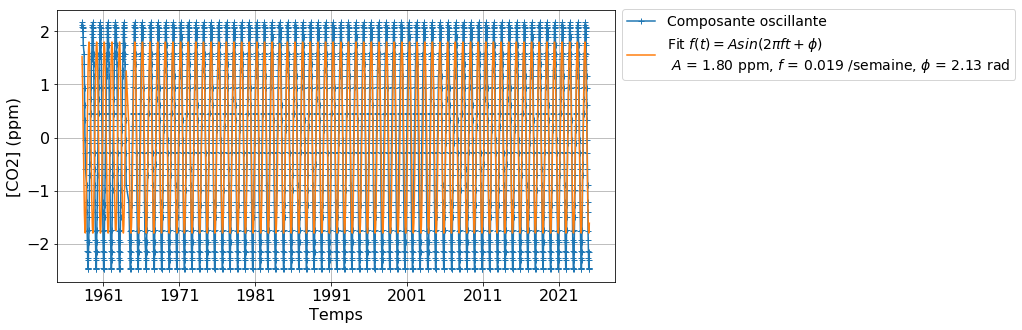

In [16]:
fig3, ax3 = plt.subplots(figsize=(10, 5))
ax3.plot(data['date'], data['oscillations'], marker = '+', label="Composante oscillante")
ax3.plot(data['date_bis'], sin_fit(data['date_num'],*popt), label=f"Fit $f(t) = A sin(2\pi f t + \phi)$ \n $A$ = {popt[0]:.2f} ppm, $f$ = {popt[1]:.3f} /semaine, $\phi$ = {popt[2]:.2f} rad")
ax3.set_xlabel('Temps', fontsize=16)
ax3.set_ylabel('[CO2] (ppm)', fontsize=16)
ax3.legend(fontsize=14,bbox_to_anchor=(1, 1.03))
ax3.tick_params(axis='both', labelsize=16)
ax3.grid()

In [17]:
print(f"L'amplitude des oscillations est de {popt[0]:.3f} ppm, leur fréquence est de {popt[1]:.3f} /semaine. Cela correspond à une période de {1/popt[1]:.3f} semaines, soit une année, comme attendu.")

L'amplitude des oscillations est de 1.800 ppm, leur fréquence est de 0.019 /semaine. Cela correspond à une période de 52.388 semaines, soit une année, comme attendu.


### 2.3. Caractérisation de la composante lente et extrapolation jusqu'à 2050

D'après les derniers [rapports du GIEC](https://www.ipcc.ch/), la concentration en CO2 dans l'atmosphère augmente avec une tendance principalement exponentielle. 

La composante lente de notre série temporelle sera donc ajustée par une courbe exponentielle de la forme $f(t) = y_0 + A e^{t/\tau}$. Cela permettra d'extrapoler les données jusqu'en 2050.

Par construction, la tendance extraite des données brutes avec `statsmodels.tsa.seasonal.seasonal_decompose` comporte des NaN pour les 26 premières semaines et les 26 dernières semaines. L'ajustement avec `scipy.optimize.curve_fit` ne supporte pas le type NaN. Nous choisissons de supprimer les lignes correspondant à des NaN afin de pouvoir utiliser `scipy.optimize.curve_fit`.

In [18]:
data_sans_NaN = data.dropna(subset=['tendance'])
data_sans_NaN

date  concentration    tendance  oscillations  date_num   date_bis
27   1959-01-10         315.50  316.300673     -2.459605      41.0 1959-01-10
28   1959-01-17         315.69  316.272115     -2.483316      42.0 1959-01-17
29   1959-01-24         315.86  316.223173     -2.297352      43.0 1959-01-24
30   1959-01-31         315.42  316.164327     -2.161713      44.0 1959-01-31
31   1959-02-14         316.94  316.111827     -1.966287      46.0 1959-02-14
32   1959-02-21         316.61  316.063269     -1.740902      47.0 1959-02-21
33   1959-02-28         316.62  315.995865     -1.488386      48.0 1959-02-28
34   1959-03-07         316.81  315.914712     -1.262435      49.0 1959-03-07
35   1959-03-21         316.73  315.844904     -0.990745      51.0 1959-03-21
36   1959-03-28         316.71  315.791923     -0.710275      52.0 1959-03-28
37   1959-04-04         317.72  315.746442     -0.493469      53.0 1959-04-04
38   1959-04-11         317.12  315.706442     -0.276853      54.0 1959-04-11
39   1959-04-18         317.64  315.671346     -0.096491      55.0 1959-04-18
40   1959-04-25         318.32  315.650192      0.149438      56.0 1959-04-25
41   1959-05-02         318.27  315.641635      0.223774      57.0 1959-05-02
42   1959-05-09         318.78  315.649808      0.443974      58.0 1959-05-09
43   1959-05-16         318.05  315.675096      0.468542      59.0 1959-05-16
44   1959-05-23         318.43  315.709519      0.733705      60.0 1959-05-23
45   1959-06-06         318.53  315.751731      0.952119      62.0 1959-06-06
46   1959-06-13         318.14  315.796635      1.158873      63.0 1959-06-13
47   1959-06-20         317.88  315.835577      1.278166      64.0 1959-06-20
48   1959-06-27         317.76  315.863654      1.476997      65.0 1959-06-27
49   1959-07-04         316.86  315.893942      1.599921      66.0 1959-07-04
50   1959-07-11         316.83  315.931923      1.540975      67.0 1959-07-11
51   1959-07-18         316.45  315.963846      1.781099      68.0 1959-07-18
52   1959-07-25         316.16  315.990769      1.943156      69.0 1959-07-25
53   1959-08-01         315.62  316.015288      2.117891      70.0 1959-08-01
54   1959-08-08         314.91  316.038365      2.074795      71.0 1959-08-08
55   1959-08-22         315.00  316.065769      2.168921      73.0 1959-08-22
56   1959-08-29         314.15  316.095962      2.075506      74.0 1959-08-29
...         ...            ...         ...           ...       ...        ...
3355 2023-12-09         421.23  422.399231     -2.459605    3428.0 2023-12-09
3356 2023-12-16         422.57  422.468173     -2.483316    3429.0 2023-12-16
3357 2023-12-23         422.06  422.549904     -2.297352    3430.0 2023-12-23
3358 2023-12-30         421.76  422.616635     -2.161713    3431.0 2023-12-30
3359 2024-01-06         422.85  422.674519     -1.966287    3432.0 2024-01-06
3360 2024-01-13         423.13  422.752212     -1.740902    3433.0 2024-01-13
3361 2024-01-20         422.65  422.831923     -1.488386    3434.0 2024-01-20
3362 2024-01-27         422.27  422.903654     -1.262435    3435.0 2024-01-27
3363 2024-02-03         423.97  422.979327     -0.990745    3436.0 2024-02-03
3364 2024-02-10         424.62  423.039231     -0.710275    3437.0 2024-02-10
3365 2024-02-17         423.58  423.097308     -0.493469    3438.0 2024-02-17
3366 2024-02-24         425.10  423.159327     -0.276853    3439.0 2024-02-24
3367 2024-03-02         424.50  423.213942     -0.096491    3440.0 2024-03-02
3368 2024-03-09         425.09  423.277404      0.149438    3441.0 2024-03-09
3369 2024-03-16         425.71  423.338942      0.223774    3442.0 2024-03-16
3370 2024-03-23         425.94  423.405000      0.443974    3443.0 2024-03-23
3371 2024-03-30         425.02  423.478269      0.468542    3444.0 2024-03-30
3372 2024-04-06         425.99  423.549231      0.733705    3445.0 2024-04-06
3373 2024-04-13         425.43  423.617212      0.952119    3446.0 2024-04-13
3374 2024-04-20         426.91  4

In [19]:
def exp_fit(t,y0,A,tau):
    return y0 + A*np.exp(t/tau)

guess = [300,100,25e3] #dans l'ordre : offset, amplitude, temps caractéristique
popt, _ = spo.curve_fit(exp_fit, data_sans_NaN['date_num'], data_sans_NaN['tendance'], p0=guess) #ajustement des données par une exponentielle

Construisons un axe temporel qui s'étend jusqu'au 1er janvier 2050 afin d'extrapoler nos données :

In [20]:
temps_2050 = np.linspace(data['date_num'].iloc[0], data['date_num'].iloc[-1]+1305,len(data['date_num']+1305)) #axe temporel jusqu'à 2050, type = float64
temps_2050_datetime = pd.to_datetime(data['date'].iloc[0]) + pd.to_timedelta(temps_2050, unit='W') #conversion vers le type = datetime64[ns]

print(f"Dernier jour de l'axe temporel : {temps_2050_datetime[-1]}")

Dernier jour de l'axe temporel : 2050-01-01 00:00:00


Nous pouvons désormais tracer la tendance des données recueillies jusqu'en 2024 et leur ajustement extrapolé jusqu'en 2050 : 

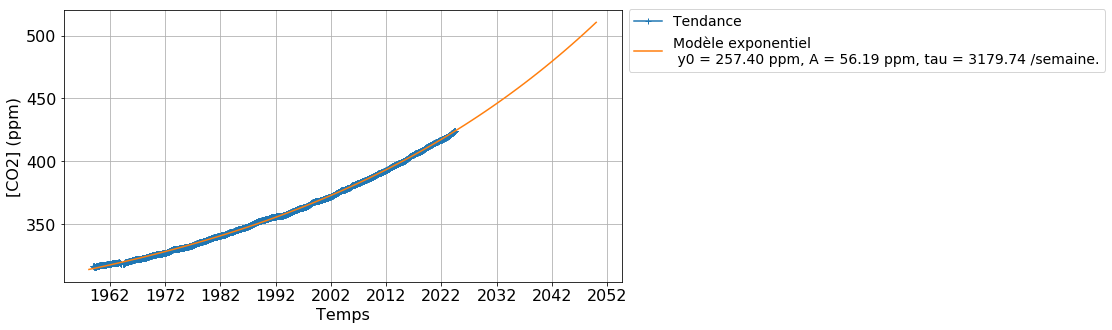

In [21]:
fig4, ax4 = plt.subplots(figsize=(10, 5))
ax4.plot(data['date'], data['tendance'], marker = '+', label="Tendance")
ax4.plot(temps_2050_datetime, exp_fit(temps_2050,*popt), label=f"Modèle exponentiel \n y0 = {popt[0]:.2f} ppm, A = {popt[1]:.2f} ppm, tau = {popt[2]:.2f} /semaine.")
ax4.set_xlabel('Temps', fontsize=16)
ax4.set_ylabel('[CO2] (ppm)', fontsize=16)
ax4.legend(fontsize=14,bbox_to_anchor=(1, 1.03))
ax4.tick_params(axis='both', labelsize=16)
ax4.grid()

In [22]:
print(f"Le modèle prédit une concentration en CO2 de {exp_fit(temps_2050[-1],*popt):.2f} ppm au 1er janvier 2050.")

Le modèle prédit une concentration en CO2 de 510.70 ppm au 1er janvier 2050.
